# PR√ÅCTICA 1
# CUANTIFICACI√ìN UNIFORME Y DITHERING

## La clase uniformeSQ
La clase UniformSQ implementada en scalib permite construir cuantificadores uniformes a partir
de una tasa de bits por muestra deseada (que establece el n√∫mero de niveles de cuantificaci√≥n) y el
rango de entrada del cuantificador (rango de las se√±ales que vamos a cuantificar). A continuaci√≥n se
muestra un ejemplo de uso de UniformSQ para cuantificar una se√±al unidimensional

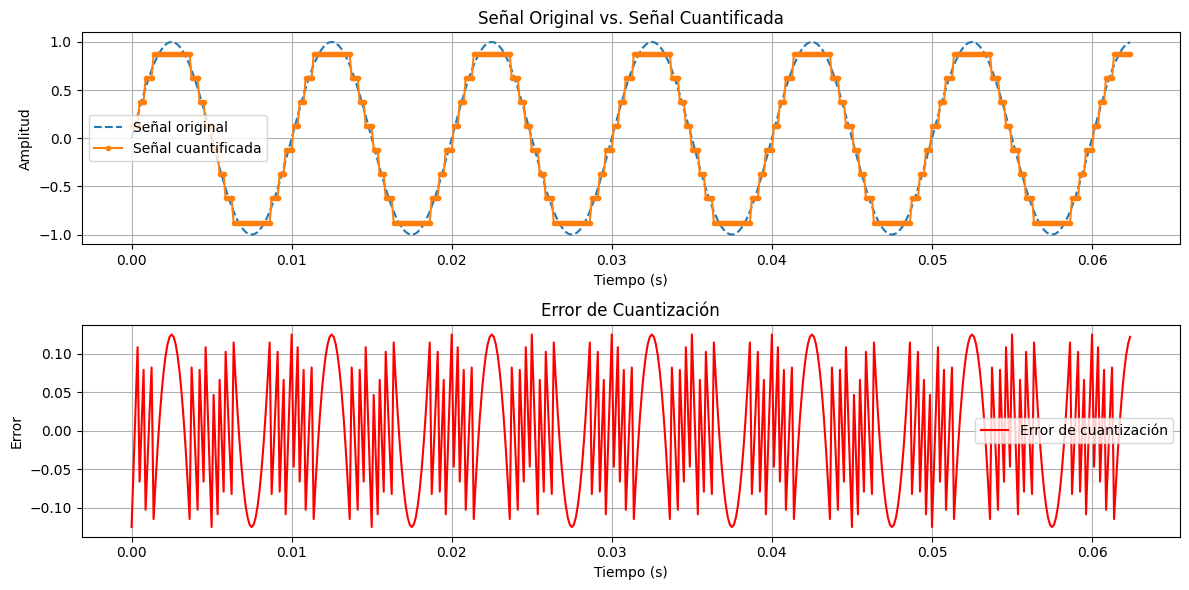

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scalib import UniformSQ

#? Par√°metros de la se√±al
fs = 8000  # Frecuencia de muestreo de 8 kHz
t = np.arange(0, 2, 1/fs)  # Vector de tiempos de 2 segundos de duraci√≥n
x = np.sin(2 * np.pi * 100 * t)  # Se√±al sinusoidal de 100 Hz

#? Configuraci√≥n de la cuantizaci√≥n
xRange = (-1, 1)  # Rango de la se√±al x
b = 3  # N√∫mero de bits por muestra

#? Cuantificaci√≥n uniforme
qtz = UniformSQ(b, xRange)  # Creaci√≥n del cuantificador
xq = qtz.quantize(x)  # Cuantificaci√≥n de la se√±al

#? C√°lculo del error de cuantizaci√≥n
error = x - xq

#? Representacioes gr√°ficas
plt.figure(figsize=(12, 6))

# Gr√°fica de la se√±al original y cuantificada
plt.subplot(2, 1, 1)
plt.plot(t[:500], x[:500], label="Se√±al original", linestyle='dashed')
plt.plot(t[:500], xq[:500], label="Se√±al cuantificada", marker='o', markersize=3)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Se√±al Original vs. Se√±al Cuantificada")
plt.legend()
plt.grid()

# Gr√°fica del error de cuantizaci√≥n
plt.subplot(2, 1, 2)
plt.plot(t[:500], error[:500], color="red", label="Error de cuantizaci√≥n")
plt.xlabel("Tiempo (s)")
plt.ylabel("Error")
plt.title("Error de Cuantizaci√≥n")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



# Ejercicio 1

Construya dos cuantificadores uniformes, uno de media contrahuella y otro de media huella. En ambos casos, la tasa de bits por muestra resultante debe ser de 3 bits. Use ambos cuantificadores para cuantificar 3 se√±ales:

- Una se√±al sinusoidal de 50 Hz y 1 s de duraci√≥n muestreada a 8 kHz.
- La se√±al de voz almacenada en el archivo `altura.wav`.
- La imagen de Lena (almacenada en el archivo `lena.png`).

Calcule la SNR de cuantificaci√≥n para todas las se√±ales cuantificadas (6 en total), reproduzca las se√±ales de voz y represente las im√°genes. Comente las diferencias en cuanto a SNR y calidad percibida de las se√±ales, comparando los dos cuantificadores.

En base a los resultados obtenidos, indique justificadamente las ventajas e inconvenientes de los cuantificadores de media contrahuella y los de media huella.


SNR Se√±al Sinusoidal - Midrise: 19.11 dB
SNR Se√±al Sinusoidal - Midtread: 17.90 dB
SNR Imagen - Midrise: 15.60 dB
SNR Imagen - Midtread: 12.90 dB
SNR Se√±al de Voz - Midrise: -1.43 dB
SNR Se√±al de Voz - Midtread: 5.03 dB
Reproduciendo se√±al cuantificada - Midrise...
Reproduciendo se√±al cuantificada - Midtread...


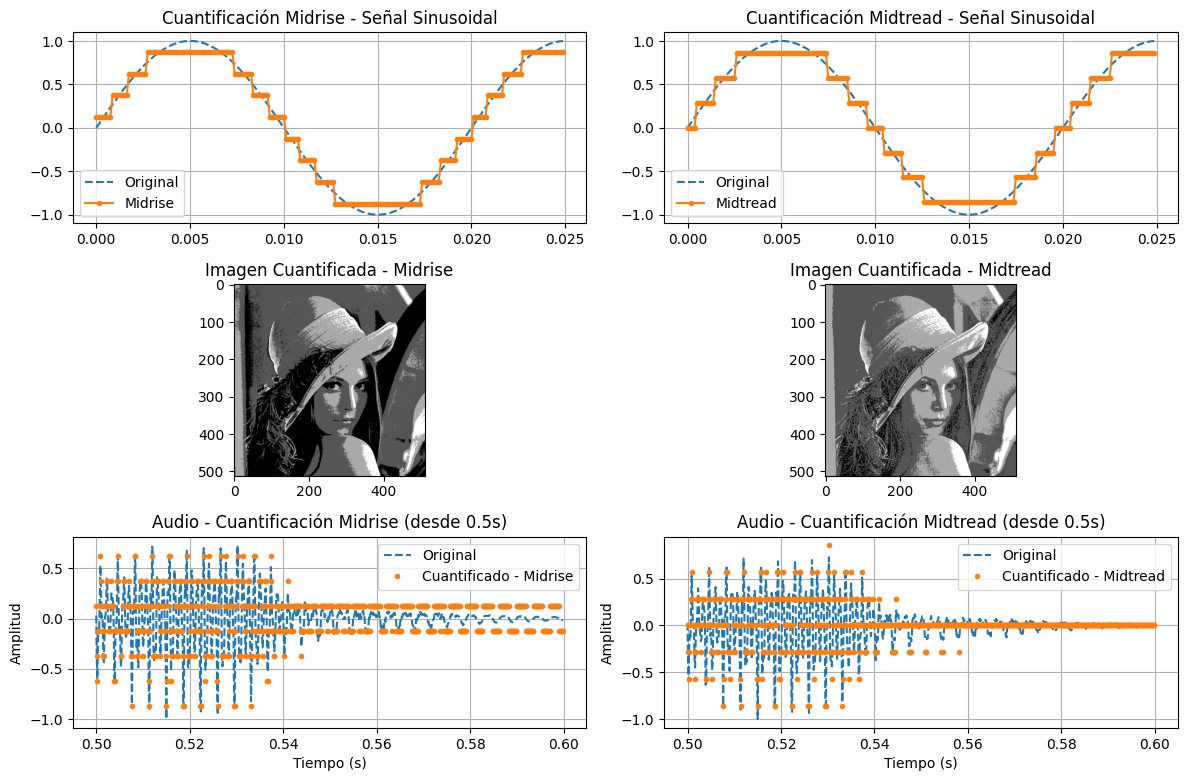

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from skimage import io, color
from scalib import UniformSQ, snr
from scipy.io import wavfile
import os


#? 1. Generar una se√±al sinusoidal de 50 Hz muestreada a 8 kHz
fs = 8000  # Frecuencia de muestreo
t = np.arange(0, 1, 1/fs)  # 1 segundo de duraci√≥n
x_sin = np.sin(2 * np.pi * 50 * t)  # Se√±al sinusoidal

#? 2. Cargar la se√±al de voz altura.wav
fs_audio, x_audio = wavfile.read("Datos/altura.wav")  # Leer archivo de audio
x_audio = x_audio / np.max(np.abs(x_audio))   # Normalizar a rango (-1,1)

#? 3. Cargar la imagen lena.png en escala de grises
img = io.imread("Datos/lena.png")
img_gray = color.rgb2gray(img)  # Convertir a escala de grises
img_gray = img_gray / np.max(img_gray)  # Normalizar a (0,1)

#? Configuraci√≥n de cuantificadores
b = 3               # 3 bits por muestra
xRange = (-1, 1)    # Rango de entrada

qtz_midrise = UniformSQ(b, xRange, qtype="midrise")   # Cuantificador de media contrahuella
qtz_midtread = UniformSQ(b, xRange, qtype="midtread") # Cuantificador de media huella

# Cuantificaci√≥n de la se√±al sinusoidal
xq_sin_midrise = qtz_midrise.quantize(x_sin)
xq_sin_midtread = qtz_midtread.quantize(x_sin)
# Cuantificaci√≥n de la se√±al de voz
xq_audio_midrise = qtz_midrise.quantize(x_audio)
xq_audio_midtread = qtz_midtread.quantize(x_audio)
# Cuantificaci√≥n de la imagen
xq_img_midrise = qtz_midrise.quantize(img_gray)
xq_img_midtread = qtz_midtread.quantize(img_gray)

#? C√°lculo de SNR
snr_sin_midrise = snr(x_sin, xq_sin_midrise)
snr_sin_midtread = snr(x_sin, xq_sin_midtread)

snr_audio_midrise = snr(x_audio, xq_audio_midrise)
snr_audio_midtread = snr(x_audio, xq_audio_midtread)

snr_img_midrise = snr(img_gray, xq_img_midrise)
snr_img_midtread = snr(img_gray, xq_img_midtread)

# Mostrar resultados de SNR
print(f"SNR Se√±al Sinusoidal - Midrise: {snr_sin_midrise:.2f} dB")
print(f"SNR Se√±al Sinusoidal - Midtread: {snr_sin_midtread:.2f} dB")

print(f"SNR Imagen - Midrise: {snr_img_midrise:.2f} dB")
print(f"SNR Imagen - Midtread: {snr_img_midtread:.2f} dB")

print(f"SNR Se√±al de Voz - Midrise: {snr_audio_midrise:.2f} dB")
print(f"SNR Se√±al de Voz - Midtread: {snr_audio_midtread:.2f} dB")

#? Representaci√≥n gr√°fica de la cuantificaci√≥n
plt.figure(figsize=(12, 10))

# Se√±al sinusoidal cuantificada
plt.subplot(4, 2, 1)
plt.plot(t[:200], x_sin[:200], label="Original", linestyle='dashed')
plt.plot(t[:200], xq_sin_midrise[:200], label="Midrise", marker='o', markersize=3)
plt.title("Cuantificaci√≥n Midrise - Se√±al Sinusoidal")
plt.legend()
plt.grid()

plt.subplot(4, 2, 2)
plt.plot(t[:200], x_sin[:200], label="Original", linestyle='dashed')
plt.plot(t[:200], xq_sin_midtread[:200], label="Midtread", marker='o', markersize=3)
plt.title("Cuantificaci√≥n Midtread - Se√±al Sinusoidal")
plt.legend()
plt.grid()

# Imagen cuantificada
plt.subplot(4, 2, 3)
plt.imshow(xq_img_midrise, cmap='gray')
plt.title("Imagen Cuantificada - Midrise")

plt.subplot(4, 2, 4)
plt.imshow(xq_img_midtread, cmap='gray')
plt.title("Imagen Cuantificada - Midtread")

# Reproducir las se√±ales de voz cuantificadas
print("Reproduciendo se√±al cuantificada - Midrise...")
sd.play(xq_audio_midrise, fs_audio)
sd.wait()

print("Reproduciendo se√±al cuantificada - Midtread...")
sd.play(xq_audio_midtread, fs_audio)
sd.wait()

# Segmento de la se√±al de audio a partir del segundo 0.5
t_audio = np.arange(0, len(x_audio)) / fs_audio
start_idx = int(0.5 * fs_audio)
end_idx = start_idx + 800

t_seg = t_audio[start_idx:end_idx]
x_audio_seg = x_audio[start_idx:end_idx]
xq_audio_midrise_seg = xq_audio_midrise[start_idx:end_idx]
xq_audio_midtread_seg = xq_audio_midtread[start_idx:end_idx]

# Se√±al de audio cuantificada - Midrise
plt.subplot(4, 2, 5)
plt.plot(t_seg, x_audio_seg, label="Original", linestyle='dashed')
plt.plot(t_seg, xq_audio_midrise_seg, label="Cuantificado - Midrise", marker='o', markersize=3, linestyle='None')
plt.title("Audio - Cuantificaci√≥n Midrise (desde 0.5s)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

# Se√±al de audio cuantificada - Midtread
plt.subplot(4, 2, 6)
plt.plot(t_seg, x_audio_seg, label="Original", linestyle='dashed')
plt.plot(t_seg, xq_audio_midtread_seg, label="Cuantificado - Midtread", marker='o', markersize=3, linestyle='None')
plt.title("Audio - Cuantificaci√≥n Midtread (desde 0.5s)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()



Ambos cuantificadores discretizan el rango `[-1, 1]`, pero lo hacen de forma distinta:

#### üü© Midrise (media contrahuella)
- Divide el rango `[-1, 1]` en **8 niveles** uniformemente espaciados.
- Los niveles est√°n **centrados entre los l√≠mites de los intervalos**.
- El primer nivel comienza en `q/2` y el √∫ltimo termina en `1 - q/2`.
- No incluye un nivel de cuantificaci√≥n exactamente en 0 o 1.

#### üü¶ Midtread (media huella)
- Usa **7 niveles** (`2^3 - 1 = 7`) para la misma tasa de bits.
- Incluye un nivel de cuantificaci√≥n exactamente en **0.5** (el valor medio del rango).
- Tiende a centrar m√°s los niveles cerca del centro del rango.

Para la se√±al sinusoide, se obtiene algo f√°cilmente deducible seg√∫n lo comentado anteriormente.

En la imagen, se ha utilizado los dos tipos de cuantizador. Como resultado, puede dar lugar a una cuantificaci√≥n m√°s **agresiva en los extremos** y m√°s suave en valores comunes (como los tonos de piel en la imagen de Lena). Este comportamiento diferente se traduce visualmente en diferencias en el contraste y los detalles representados, especialmente en zonas con transiciones suaves de gris.

Por √∫ltimo, para la se√±al de audio obtenemos un resultado interesante. Puesto que el cuantizador de media huella incluye un nivel exacto en 0, cuando reproducimos la se√±al cuantificada de audio con este cuantizador, se perciben "cortes" en el audio. Esto se debe a que la se√±al resultante no discrimina entre un valor cero y un valor parecido a cero (no discrimina el posible ruido) y, puesto que la se√±al de audio toma valores "iguales" a cero con mayor probabilidad, el resultado es una SNR mayor.

Por ello, cuando cuantificamos en media contrahuella, escuchamos en todo momento un "ruido" de fondo y ligeramente m√°s precisi√≥n de cuantizaci√≥n en los extremos. La SNR comparada con el caso anterior es menor.

# Ejercicio 2

En este ejercicio trabajaremos con la cuantificaci√≥n de una se√±al sinusoidal de 50 Hz y 1 segundo de duraci√≥n, muestreada a 8 kHz. A continuaci√≥n, se muestran paso a paso las tareas solicitadas, junto con explicaciones y el c√≥digo en Python.

---

### 1. Generaci√≥n de la se√±al y cuantificaci√≥n

1. **Se√±al sinusoidal**  
   - Frecuencia: 50 Hz  
   - Duraci√≥n: 1 s  
   - Frecuencia de muestreo: 8 kHz  
   - Por tanto, el n√∫mero de muestras total es 8000.

2. **Cuantificador uniforme de media contrahuella (midrise)**  
   - Tasa de bits por muestra: 3 bits  
   - El n√∫mero de niveles de cuantificaci√≥n en modo ‚Äúmedia contrahuella‚Äù es $L = 2^b = 8 $.  
   - El tama√±o del cuanto $q$ se obtiene a partir del rango de la se√±al. Puesto que la sinusoidal generada va de -1 a 1, el rango es 2. Entonces, $q = \frac{2}{8} = 0.25$.  
   - Observa que en un cuantificador de media contrahuella no existe un nivel exactamente igual a 0.  


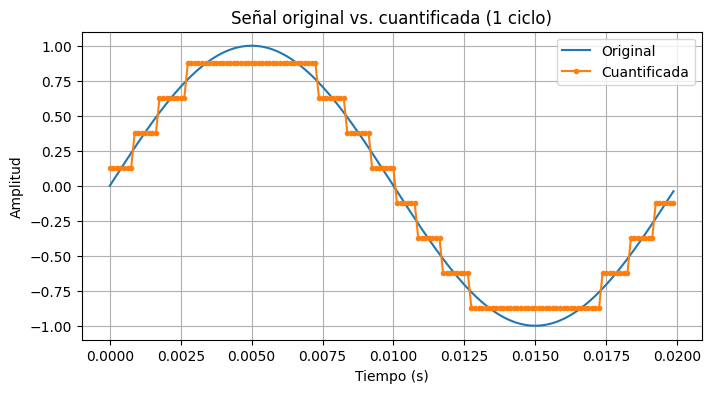

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scalib import UniformSQ, snr, toDB

#? 1. Generaci√≥n de la se√±al sinusoidal
fs = 8000            # Frec. de muestreo
f = 50               # Frecuencia de la seno
t = np.arange(0, 1, 1/fs)  # Vector de tiempo, 1 s de duraci√≥n
x = np.sin(2 * np.pi * f * t)  # Se√±al sinusoidal

#? 2. Cuantificador uniforme de media contrahuella
b = 3
xRange = (-1, 1)  # Rango de la se√±al, pues x va de -1 a 1
qtz = UniformSQ(b, xRange, qtype='midrise')  # Cuantificador midrise
xq = qtz.quantize(x)                         # Se√±al cuantificada

#? 3. Representaci√≥n de la se√±al original y cuantificada en 1 ciclo (160 muestras)
nCiclo = 160
plt.figure(figsize=(8,4))
plt.plot(t[:nCiclo], x[:nCiclo], label='Original')
plt.plot(t[:nCiclo], xq[:nCiclo], label='Cuantificada', marker='o', markersize=3)
plt.title('Se√±al original vs. cuantificada (1 ciclo)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


### Preguntas:
 - **¬øCu√°ntos niveles de cuantificaci√≥n se aprecian?**

   Se aprecian 8 niveles (pues b=3 bits => $2^3=8$ niveles).

 - **¬øHay alg√∫n nivel de valor 0?**

   No, en midrise no se incluye el nivel 0 exactamente, por construcci√≥n.

 - **¬øEs este el resultado esperado?**

   S√≠, porque el cuantificador de media contrahuella desplaza los niveles
   de modo que no coincidan con 0.
___

### 2. C√°lculo de la potencia del error de cuantificaci√≥n y comparaci√≥n te√≥rica

1. Potencia experimental del error

   - Se define el error de cuantificaci√≥n como $e[n] = x[n] - x_q[n]$.
 
   - La potencia media del error (MSE) es $P_e = E[e^2[n]]$.
        Para mayor comodidad, podemos expresarla en decibelios usando $10 \log_{10}(P_e)$.

2. Potencia te√≥rica del error

   - Para un cuantificador uniforme midrise con paso $q$, la potencia del error (para una se√±al bien ajustada al rango) suele aproximarse por $q^2 / 12$.

   - Dado $q = 0.25$, $q^2 = 0.0625$. Entonces $\frac{q^2}{12} = \frac{0.0625}{12} \approx 0.0052083$.

   - En decibelios, $10 \log_{10}(0.0052083) \approx -22.83 \text{ dB}$.

In [ ]:

#? 4. C√°lculo de la potencia del error
error = x - xq

# Calcular la potencia del error experimental
Pe = 0
for e in error:
        Pe += e**2
Pe /= len(error)

Pe_dB = 10 * np.log10(Pe)
q = (xRange[1] - xRange[0]) / 2**b  # = 2 / 8 = 0.25
Pe_teorica = q**2 / 12
Pe_teorica_dB = 10 * np.log10(Pe_teorica)

print(f"Potencia del error experimental (lineal): {Pe:.6f}")
print(f"Potencia del error experimental (dB): {Pe_dB:.2f} dB")
print(f"Potencia te√≥rica del error (lineal): {Pe_teorica:.6f}")
print(f"Potencia te√≥rica del error (dB): {Pe_teorica_dB:.2f} dB")


Potencia del error experimental (lineal): 0.006194
Potencia del error experimental (dB): -22.08 dB
Potencia te√≥rica del error (lineal): 0.005208
Potencia te√≥rica del error (dB): -22.83 dB


La potencia del error de cuantificaci√≥n uniforme se puede aproximar te√≥ricamente cuando se modela el error como una variable aleatoria uniforme en el intervalo $\left[-\frac{q}{2}, \frac{q}{2}\right]$, donde $q$ es el tama√±o del cuanto. Dado que la media de esta distribuci√≥n es cero, la potencia del error coincide con su varianza:

$$
P_e = \text{Var}(e) = \frac{q^2}{12}
$$

Esta expresi√≥n es v√°lida bajo la suposici√≥n de que la se√±al es suficientemente compleja y el error no est√° correlacionado con ella. Dado que la densidad es constante (distribuci√≥n uniforme), $f(e) = \frac{1}{q}$, la potencia es:

$$
P_e = \int_{-\frac{q}{2}}^{\frac{q}{2}} e^2 \cdot \frac{1}{q} \, de = \frac{1}{q} \int_{-\frac{q}{2}}^{\frac{q}{2}} e^2 \, de = \frac{1}{q} \left[\frac{e^3}{3}\right]_{-\frac{q}{2}}^{\frac{q}{2}} =\frac{1}{q} \frac{q^3}{12} = \frac{q^2}{12}
$$

Por ejemplo, si $q = 0.25$, entonces:

$$
P_e = \frac{0.25^2}{12} = \frac{0.0625}{12} \approx 0.005208
$$

Y en decibelios:

$$
P_{\text{dB}} = 10 \log_{10}(0.005208) \approx -22.83\ \text{dB}
$$

**La potencia experimental del error puede diferir ligeramente de la te√≥rica debido a:**
 - El uso de un n√∫mero finito de muestras (solo 1s de duraci√≥n).
 - La posible ligera desadaptaci√≥n del rango si la se√±al no ocupa perfectamente -1 a 1.
___

### 3. C√°lculo y representaci√≥n del espectro
- Para visualizar el espectro de la se√±al original y la se√±al cuantificada, podemos usar la Transformada R√°pida de Fourier (FFT).

- Observaremos c√≥mo la cuantificaci√≥n introduce distorsi√≥n (arm√≥nicos adicionales y ensanchamiento espectral).

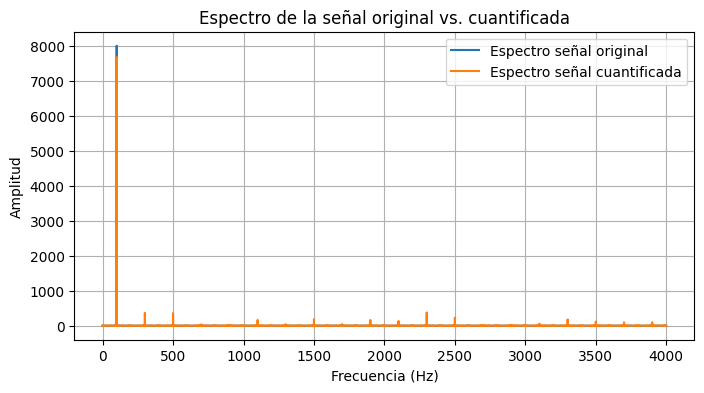

In [15]:
# 5. C√°lculo y representaci√≥n del espectro
X = np.fft.fft(x)
Xq = np.fft.fft(xq)
N = len(x)
freq = np.fft.fftfreq(N, d=1/fs)

# Nos quedamos con la mitad del espectro (parte positiva)
half = N // 2
plt.figure(figsize=(8,4))
plt.plot(freq[:half], np.abs(X[:half]), label='Espectro se√±al original')
plt.plot(freq[:half], np.abs(Xq[:half]), label='Espectro se√±al cuantificada')
plt.title('Espectro de la se√±al original vs. cuantificada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()




# Ejercicio 3



--- Dither: rectangular ---
Potencia te√≥rica dither  : 0.005208
Potencia experimental    : 0.005279
Error te√≥rico (aprox)    : 0.010417
Error experimental       : 0.009763

--- Dither: triangular ---
Potencia te√≥rica dither  : 0.010417
Potencia experimental    : 0.010501
Error te√≥rico (aprox)    : 0.015625
Error experimental       : 0.013560

--- Dither: gaussian ---
Potencia te√≥rica dither  : 0.015625
Potencia experimental    : 0.015929
Error te√≥rico (aprox)    : 0.020833
Error experimental       : 0.017537


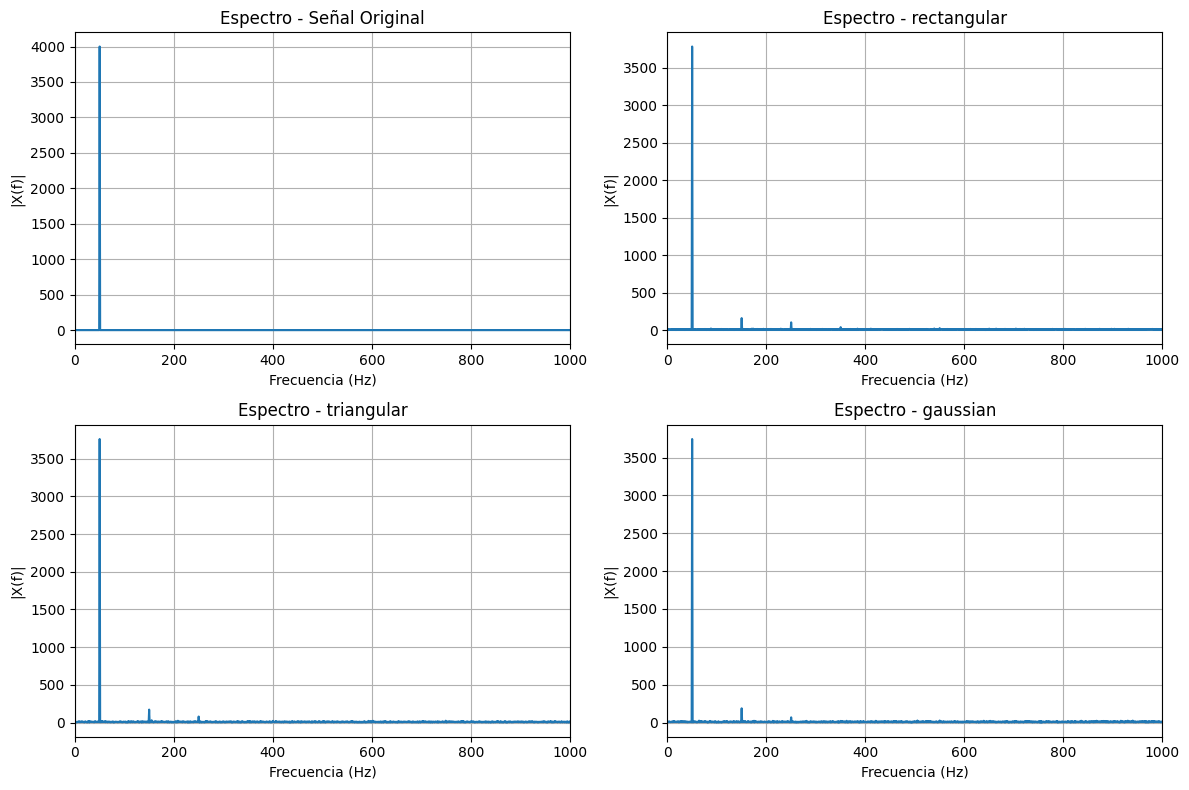

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scalib import UniformSQ, genDither, snr
import scipy.fft

# 1) Generar se√±al sinusoidal
fs = 8000
t = np.arange(0, 1, 1/fs)  # 1 segundo
x = np.sin(2 * np.pi * 50 * t)  # se√±al sinusoidal de 50 Hz

# 2) Configurar cuantificador uniforme (3 bits, midrise)
b = 3
xRange = (-1, 1)
qtz_midrise = UniformSQ(b, xRange, qtype="midrise")  # media contrahuella
q = qtz_midrise.q  # tama√±o del cuanto

# Tipos de dither a probar
dither_types = ["rectangular", "triangular", "gaussian"]

# Almacenar resultados para cada tipo de dither
results = {}

for dither_pdf in dither_types:
    # 3) Generar dither con la amplitud correspondiente al cuantificador
    dither = genDither(len(x), q, pdf=dither_pdf)  # seg√∫n la pr√°ctica

    # Potencia te√≥rica del dither, seg√∫n la PDF
    if dither_pdf == "rectangular":
        p_dither_theory = q**2 / 12.0
    elif dither_pdf == "triangular":
        p_dither_theory = q**2 / 6.0
    elif dither_pdf == "gaussian":
        p_dither_theory = q**2 / 4.0
    
    # 4) A√±adir dither a la se√±al
    x_dithered = x + dither  # Ojo con saturaci√≥n si se sale de (-1,1)

    # Potencia experimental del dither
    p_dither_exp = np.mean(dither**2)

    # 5) Cuantificar la se√±al ditherizada
    xq_dithered = qtz_midrise.quantize(x_dithered)

    # 6) Calcular error de cuantificaci√≥n
    error = x - xq_dithered
    p_error_exp = np.mean(error**2)

    # Potencia te√≥rica esperada del error total (aprox).
    # Sin correlaci√≥n, error total ~ error cuant. + p_dither_theory,
    # donde error cuant. ~ q^2/12. Pero aqu√≠ ya tenemos
    # un modelo simple: p_error_teo ~ (q^2/12) + p_dither_theory
    # Nota: Este modelo es muy aproximado.
    p_error_teo = (q**2 / 12.0) + p_dither_theory

    # Guardar resultados
    results[dither_pdf] = {
        "p_dither_theory": p_dither_theory,
        "p_dither_exp": p_dither_exp,
        "p_error_theory": p_error_teo,
        "p_error_exp": p_error_exp,
        "xq_dithered": xq_dithered
    }

# 7) Imprimir resultados
for dither_pdf, vals in results.items():
    print(f"\n--- Dither: {dither_pdf} ---")
    print(f"Potencia te√≥rica dither  : {vals['p_dither_theory']:.6f}")
    print(f"Potencia experimental    : {vals['p_dither_exp']:.6f}")
    print(f"Error te√≥rico (aprox)    : {vals['p_error_theory']:.6f}")
    print(f"Error experimental       : {vals['p_error_exp']:.6f}")

# 8) Representar espectros: original vs. cada dither
plt.figure(figsize=(12, 8))

# Espectro de la se√±al original
X_orig = np.fft.fft(x)
faxis = np.fft.fftfreq(len(x), 1/fs)
plt.subplot(2, 2, 1)
plt.plot(faxis, np.abs(X_orig), label="Original", color='C0')
plt.title("Espectro - Se√±al Original")
plt.xlim([0, 1000])  # zona de inter√©s
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("|X(f)|")
plt.grid()

# Para cada dither, mostrar espectro de la se√±al cuantificada
for i, dither_pdf in enumerate(dither_types, start=2):
    xqd = results[dither_pdf]["xq_dithered"]
    Xqd = np.fft.fft(xqd)
    plt.subplot(2, 2, i)
    plt.plot(faxis, np.abs(Xqd), label=f"Cuant. + {dither_pdf}")
    plt.title(f"Espectro - {dither_pdf}")
    plt.xlim([0, 1000])
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("|X(f)|")
    plt.grid()

plt.tight_layout()
plt.show()
